In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/6/2016.10.08_21.25.09_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/8  21:25:9
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



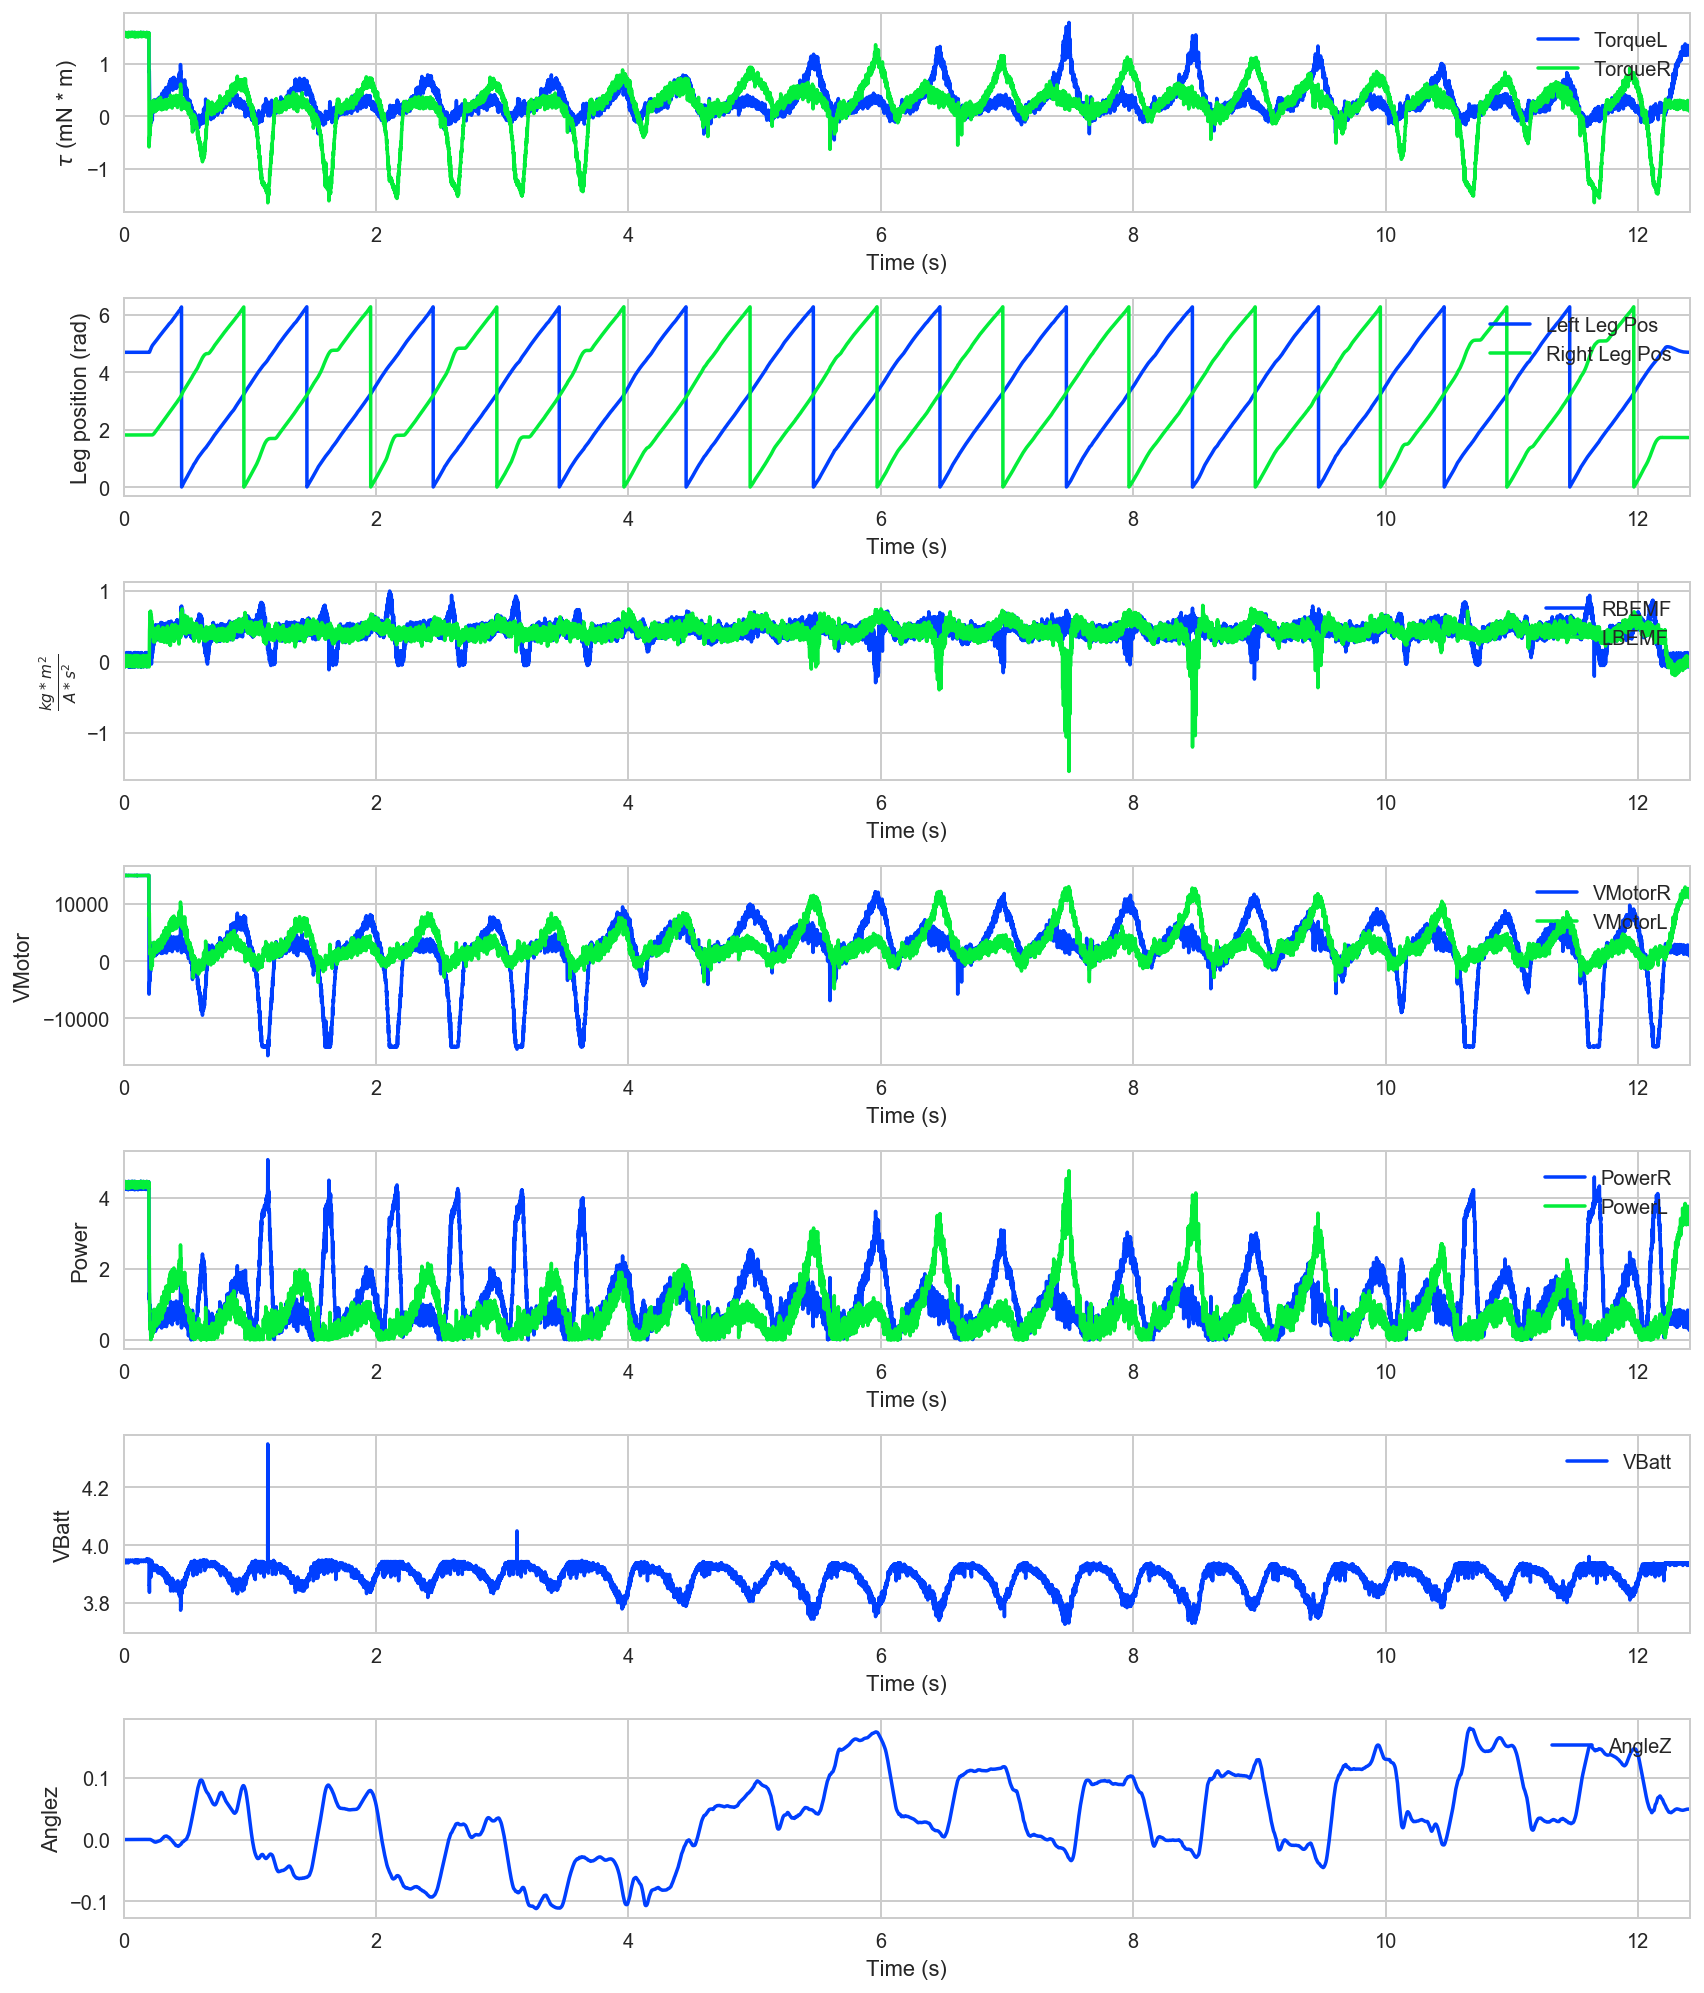

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

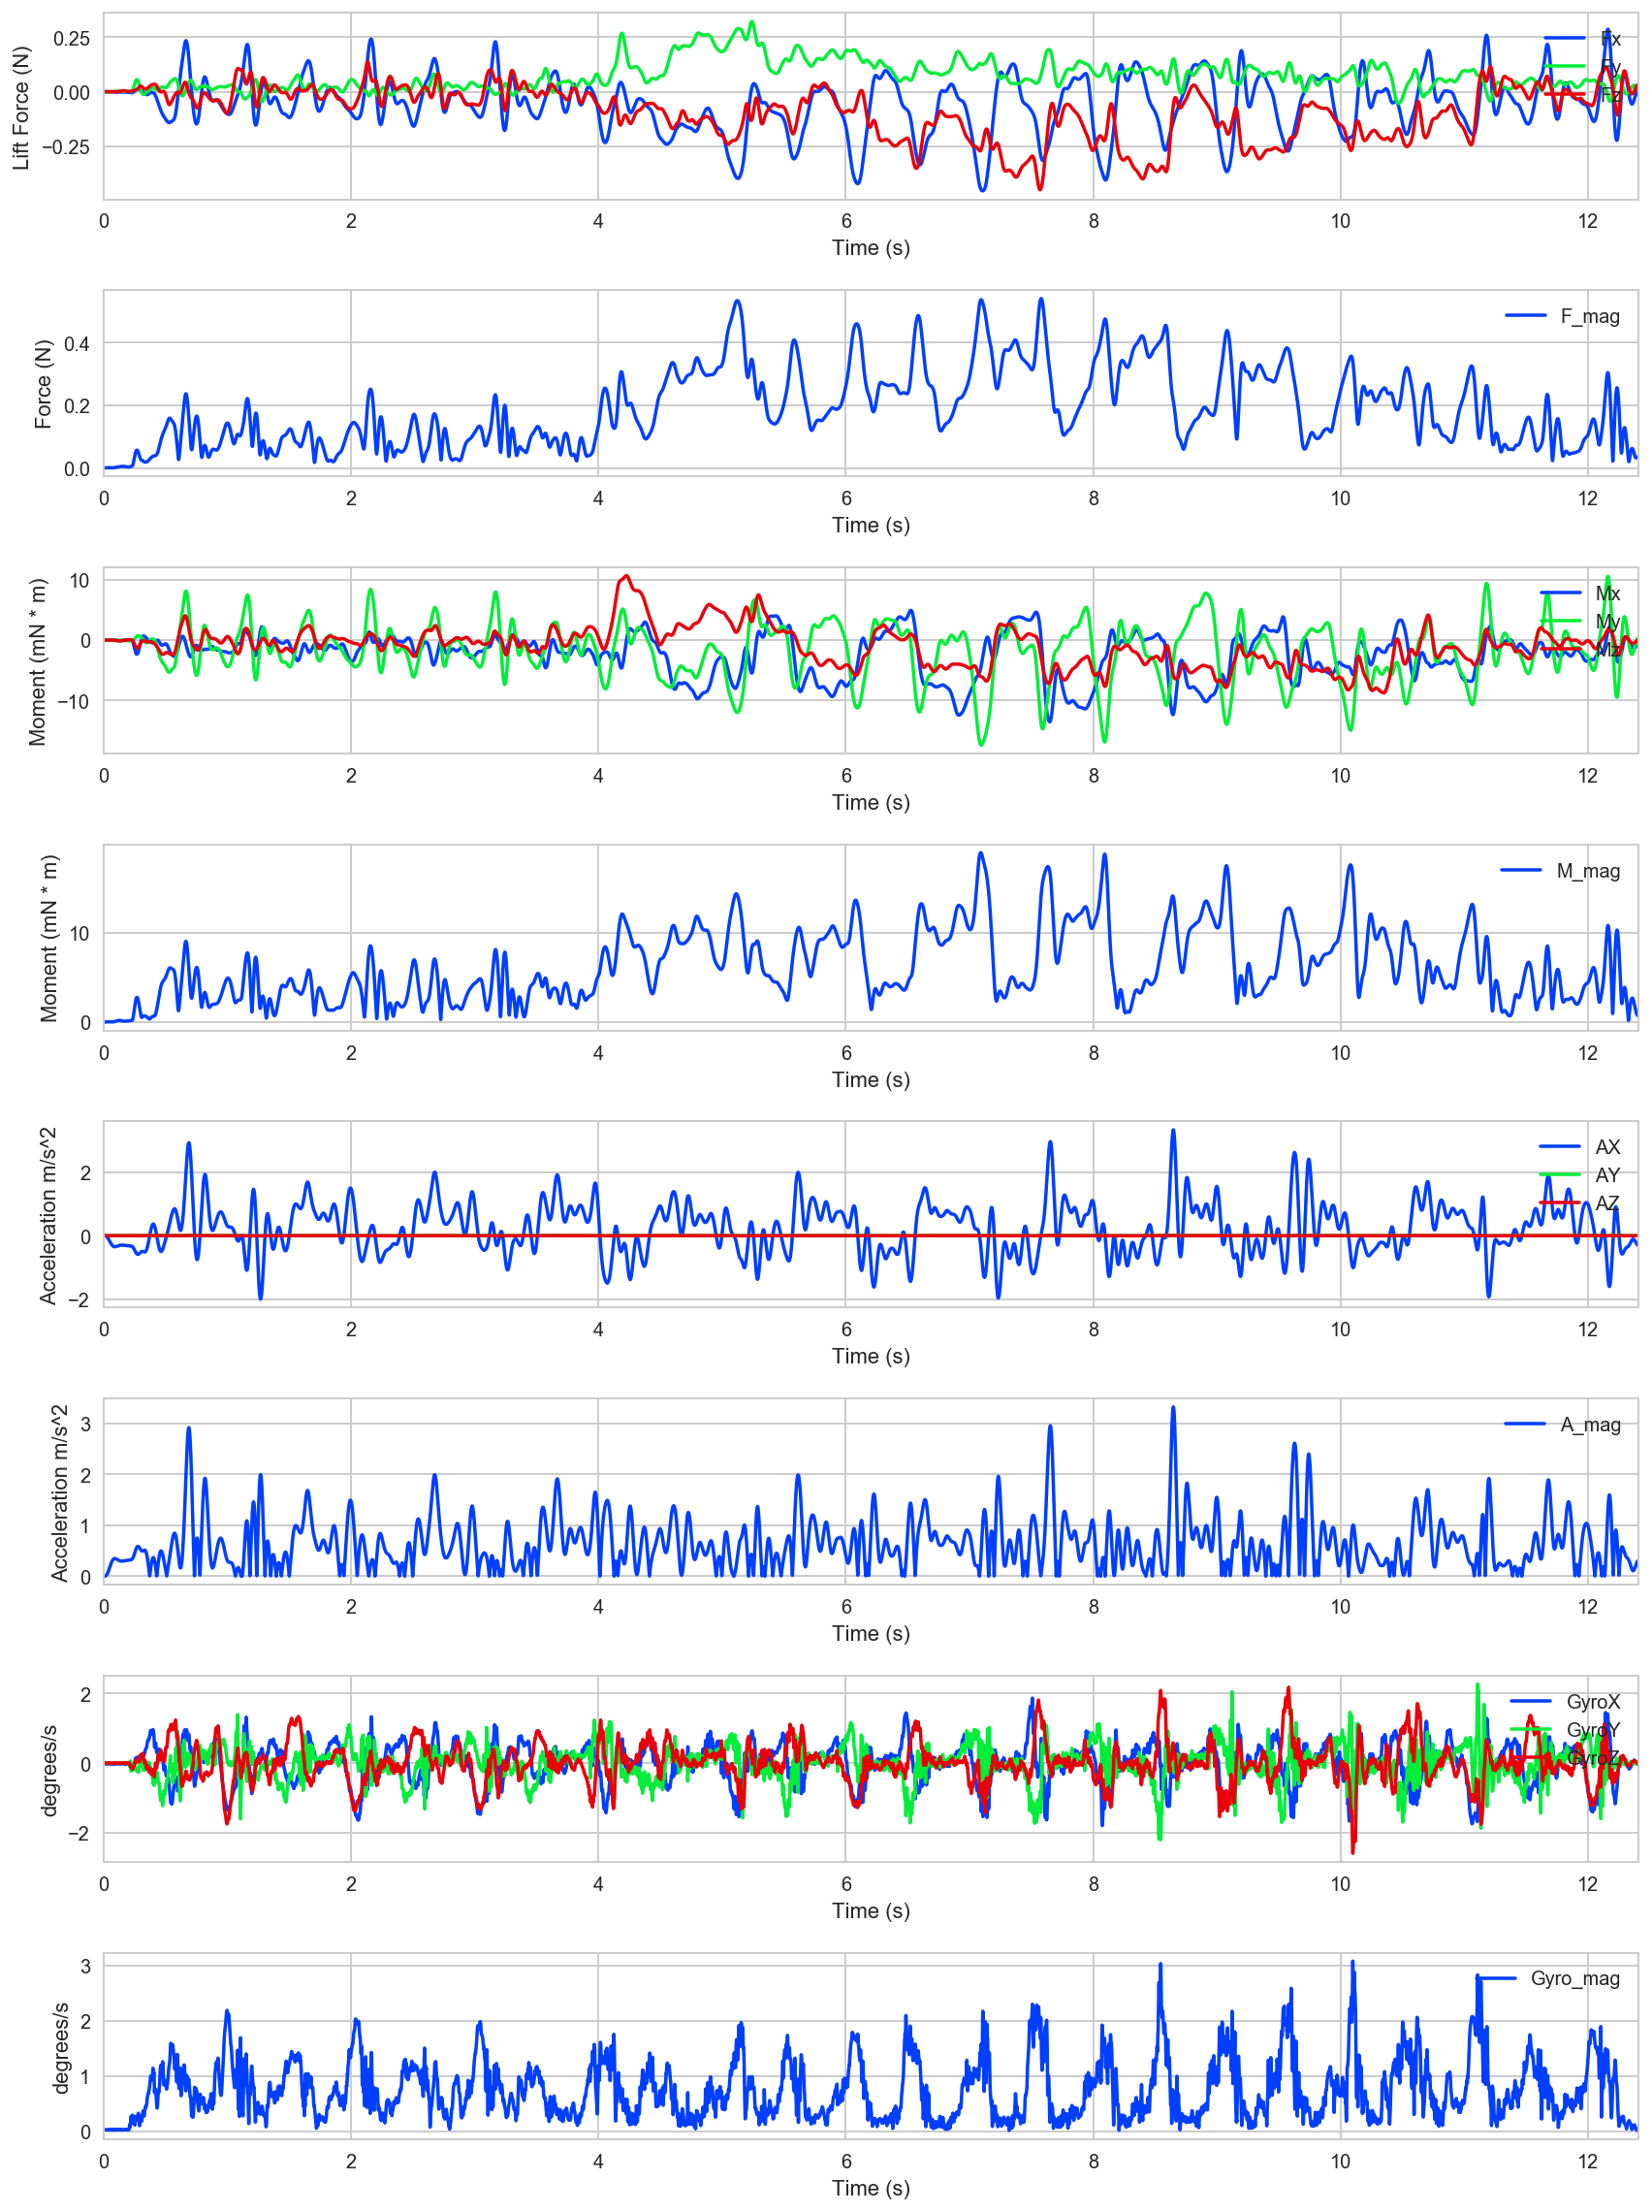

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

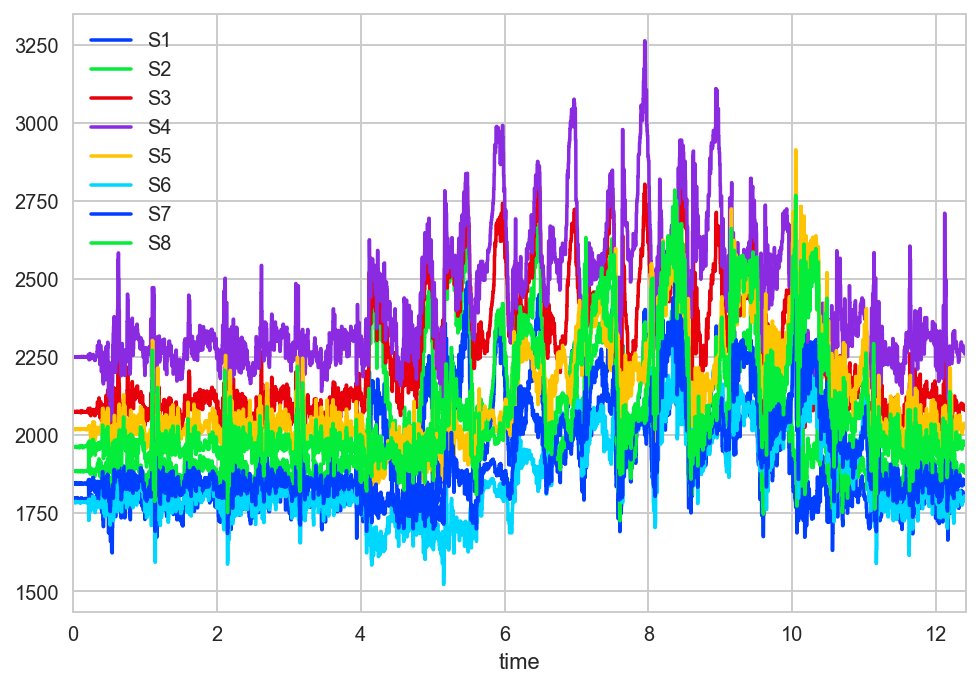

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=6.1595/100.,
                                           start_time=6000, end_time=10000, same_power_across_experiments=0)
print cot
     
    

Here is the cost of transport for inside flaps
power:1.88240106011
42.5149868391


In [8]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=6000,end_time=10000)
print drag

drag energy (kg*cm^2/s^2): 196.689776828
0.0196689776828


In [9]:
electrical_energy = utils.calculate_electrical_energy(df, start_time=6000, end_time=10000)

electrical energy (Joules): 7.52960424043


In [17]:
import numpy as np
start = df['Right Leg Pos'][6000:7500].argmax()
end = df['Right Leg Pos'][9500:10000].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

6499 9948
3.52930662332
6.28050133698
[[ 6499  7499]
 [ 7499  8499]
 [ 8499  9499]
 [ 9499 10499]]


In [18]:
drags = utils.get_drag_energy_from_list(df, False, intervals)
print drags

drag energy (kg*cm^2/s^2): 70.847868849
drag energy (kg*cm^2/s^2): 46.9937966337
drag energy (kg*cm^2/s^2): 28.3215367758
drag energy (kg*cm^2/s^2): 38.2875250005
[0.007084786884900106, 0.004699379663370169, 0.002832153677581204, 0.0038287525000538]
